<a href="https://colab.research.google.com/github/saipragna25/deep-learning-data-augmentation-assignment/blob/main/DL_regularizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import the necessary libraries and load the dataset:

In [35]:
import tensorflow as tf
from tensorflow.keras import regularizers, layers, models
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


function to build neural network model with regularization options

In [36]:
def create_model(regularization=None, l1_factor=0.01, l2_factor=0.01):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))

    if regularization == 'l1':
        model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(l1_factor)))
    elif regularization == 'l2':
        model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_factor)))
    elif regularization == 'l1_l2':
        model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1_factor, l2=l2_factor)))
    else:
        model.add(layers.Dense(128, activation='relu'))

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


training and evaluating  models with L1&L2 regularization techniques

In [37]:
#No regularization
model_no_reg = create_model()
history_no_reg=model_no_reg.fit(x_train, y_train, epochs=10, validation_split=0.2)
test_loss, test_acc = model_no_reg.evaluate(x_test, y_test)
print(f"Test accuracy without regularization: {test_acc}")


Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5228 - accuracy: 0.8162 - val_loss: 0.4387 - val_accuracy: 0.8377
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3874 - accuracy: 0.8617 - val_loss: 0.4202 - val_accuracy: 0.8518
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3472 - accuracy: 0.8732 - val_loss: 0.3602 - val_accuracy: 0.8747
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3207 - accuracy: 0.8835 - val_loss: 0.3309 - val_accuracy: 0.8820
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3000 - accuracy: 0.8895 - val_loss: 0.3345 - val_accuracy: 0.8813
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2857 - accuracy: 0.8951 - val_loss: 0.3302 - val_accuracy: 0.8837
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2730 - accuracy: 0.8993 - val_loss: 0.3375 - val_accuracy:

In [38]:
#L1 Regularization
model_l1 = create_model(regularization='l1', l1_factor=0.001)
history_l1=model_l1.fit(x_train, y_train, epochs=10, validation_split=0.2)
test_loss, test_acc = model_l1.evaluate(x_test, y_test)
print(f"Test accuracy with L1 regularization: {test_acc}")


Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.3320 - accuracy: 0.7806 - val_loss: 0.8702 - val_accuracy: 0.8005
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8277 - accuracy: 0.8027 - val_loss: 0.7703 - val_accuracy: 0.8191
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7582 - accuracy: 0.8153 - val_loss: 0.7857 - val_accuracy: 0.7912
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7188 - accuracy: 0.8221 - val_loss: 0.7349 - val_accuracy: 0.8087
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6890 - accuracy: 0.8256 - val_loss: 0.6915 - val_accuracy: 0.8257
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6730 - accuracy: 0.8301 - val_loss: 0.6640 - val_accuracy: 0.8290
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6578 - accuracy: 0.8314 - val_loss: 0.6581 - val_accuracy:

In [39]:
#L2 Regularization
model_l2 = create_model(regularization='l2', l2_factor=0.001)
history_l2=model_l2.fit(x_train, y_train, epochs=10, validation_split=0.2)
test_loss, test_acc = model_l2.evaluate(x_test, y_test)
print(f"Test accuracy with L2 regularization: {test_acc}")


Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6684 - accuracy: 0.8162 - val_loss: 0.5530 - val_accuracy: 0.8413
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5215 - accuracy: 0.8470 - val_loss: 0.5148 - val_accuracy: 0.8425
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4837 - accuracy: 0.8561 - val_loss: 0.4691 - val_accuracy: 0.8614
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4729 - accuracy: 0.8579 - val_loss: 0.4603 - val_accuracy: 0.8626
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4528 - accuracy: 0.8649 - val_loss: 0.4820 - val_accuracy: 0.8497
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4490 - accuracy: 0.8644 - val_loss: 0.4840 - val_accuracy: 0.8488
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4417 - accuracy: 0.8682 - val_loss: 0.4490 - val_accuracy:

In [40]:
#L1 and L2 regularization combined
model_l1_l2 = create_model(regularization='l1_l2', l1_factor=0.001, l2_factor=0.001)
history_l1_l2=model_l1_l2.fit(x_train, y_train, epochs=10, validation_split=0.2)
test_loss, test_acc = model_l1_l2.evaluate(x_test, y_test)
print(f"Test accuracy with L1 and L2 regularization combined: {test_acc}")


Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.3014 - accuracy: 0.7791 - val_loss: 0.9034 - val_accuracy: 0.7788
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8442 - accuracy: 0.8012 - val_loss: 0.8191 - val_accuracy: 0.7973
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7827 - accuracy: 0.8084 - val_loss: 0.7657 - val_accuracy: 0.8095
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7402 - accuracy: 0.8159 - val_loss: 0.7539 - val_accuracy: 0.8068
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7111 - accuracy: 0.8217 - val_loss: 0.6947 - val_accuracy: 0.8282
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.6908 - accuracy: 0.8239 - val_loss: 0.7053 - val_accuracy: 0.8251
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6717 - accuracy: 0.8287 - val_loss: 0.6775 - val_accuracy:

dropout regularization

In [41]:
#Applying droupout regularization at input,hidden and both layers
def create_model_dropout(dropout_position=None, dropout_rate=0.5):
    model = models.Sequential()
    
    if dropout_position == 'input':
        model.add(layers.Dropout(dropout_rate, input_shape=(28, 28)))
        model.add(layers.Flatten())
    else:
        model.add(layers.Flatten(input_shape=(28, 28)))
    
    model.add(layers.Dense(128, activation='relu'))
    
    if dropout_position == 'hidden' or dropout_position == 'both':
        model.add(layers.Dropout(dropout_rate))
    
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [42]:
num_epochs = 10

# Train models and store their histories
model_no_reg = create_model()
history_no_reg = model_no_reg.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)

model_dropout_input = create_model_dropout(dropout_position='input', dropout_rate=0.5)
history_dropout_input = model_dropout_input.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)

model_dropout_hidden = create_model_dropout(dropout_position='hidden', dropout_rate=0.5)
history_dropout_hidden = model_dropout_hidden.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)

model_dropout_both = create_model_dropout(dropout_position='both', dropout_rate=0.5)
history_dropout_both = model_dropout_both.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5186 - accuracy: 0.8191 - val_loss: 0.4203 - val_accuracy: 0.8494
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3880 - accuracy: 0.8596 - val_loss: 0.3853 - val_accuracy: 0.8605
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3459 - accuracy: 0.8744 - val_loss: 0.3494 - val_accuracy: 0.8744
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3194 - accuracy: 0.8824 - val_loss: 0.3412 - val_accuracy: 0.8792
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3006 - accuracy: 0.8880 - val_loss: 0.3424 - val_accuracy: 0.8743
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2860 - accuracy: 0.8938 - val_loss: 0.3320 - val_accuracy: 0.8795
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2699 - accuracy: 0.8993 - val_loss: 0.3433 - val_accuracy:

In [43]:
def plot_loss(history, label):
    fig, ax = plt.subplots(figsize=(12, 6))
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = np.arange(1, len(loss) + 1)
        
    plt.plot(epochs, loss, label=f"{label} - loss")
    plt.plot(epochs, val_loss, label=f"{label} - val_loss")
    
    plt.title('Loss and Validation Loss of Models with Different Dropout Regularizations')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid(True)
    plt.show()


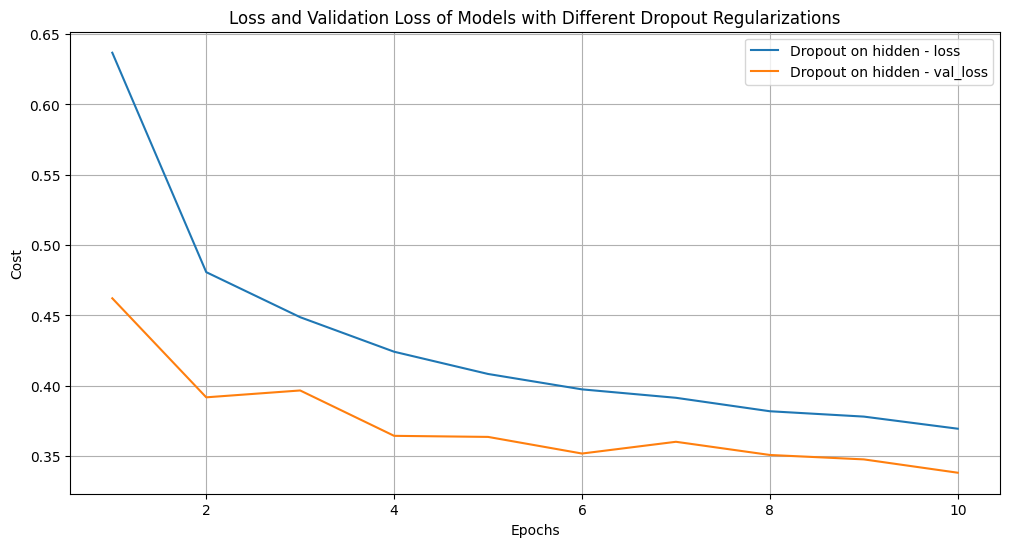

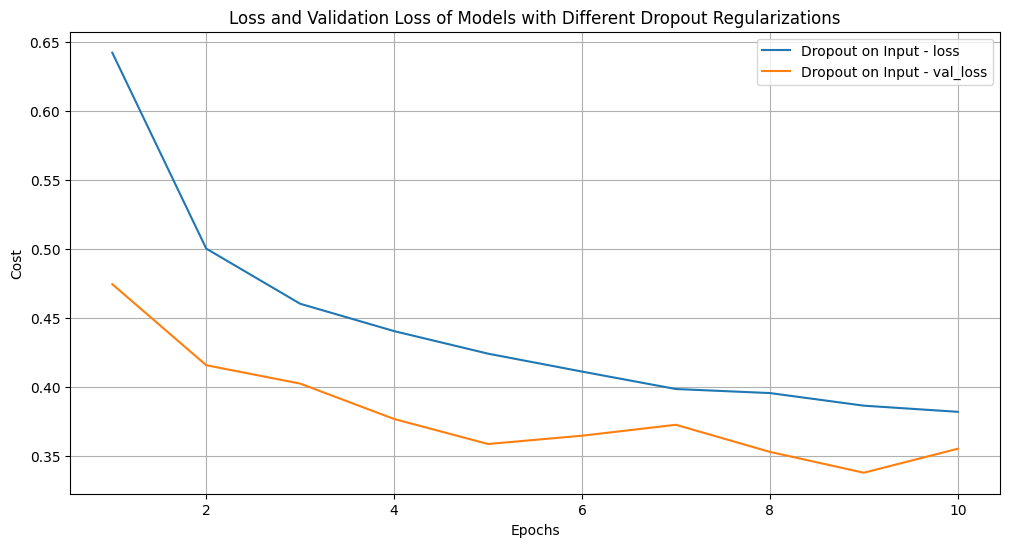

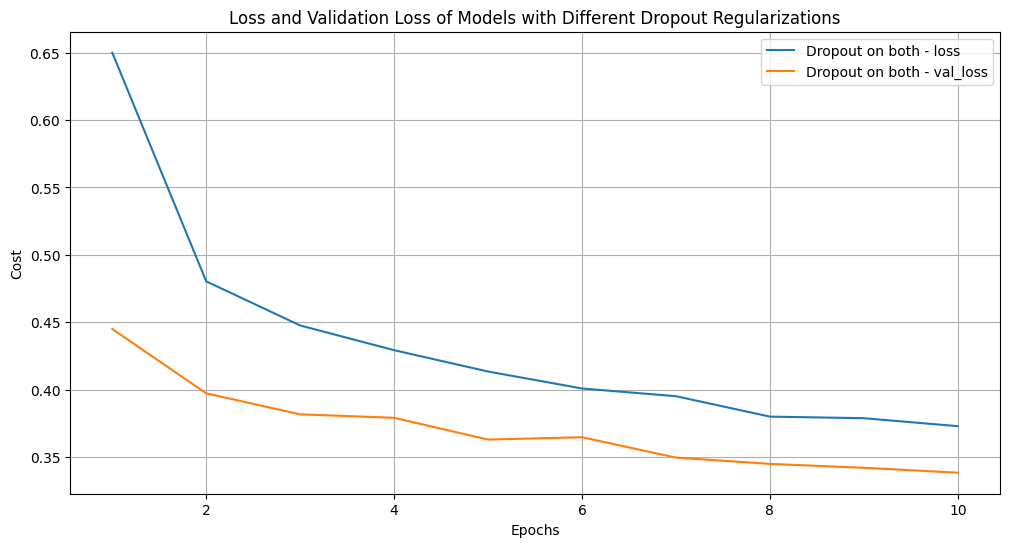

In [44]:

plot_loss(history_dropout_hidden, 'Dropout on hidden')
plot_loss(history_dropout_input, 'Dropout on Input')
plot_loss(history_dropout_both, 'Dropout on both')

EarlyStopping

In [45]:
from tensorflow.keras.callbacks import EarlyStopping


In [46]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [47]:
num_epochs = 50  # Increase the number of epochs since early stopping will be applied

model_earlystp = create_model()
history_early_stopping = model_earlystp.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5188 - accuracy: 0.8199 - val_loss: 0.4612 - val_accuracy: 0.8352
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3939 - accuracy: 0.8614 - val_loss: 0.4085 - val_accuracy: 0.8543
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3520 - accuracy: 0.8723 - val_loss: 0.3653 - val_accuracy: 0.8662
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3253 - accuracy: 0.8801 - val_loss: 0.3578 - val_accuracy: 0.8752
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3052 - accuracy: 0.8871 - val_loss: 0.3480 - val_accuracy: 0.8748
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2874 - accuracy: 0.8953 - val_loss: 0.3248 - val_accuracy: 0.8819
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2750 - accuracy: 0.8969 - val_loss: 0.3435 - val_accuracy:

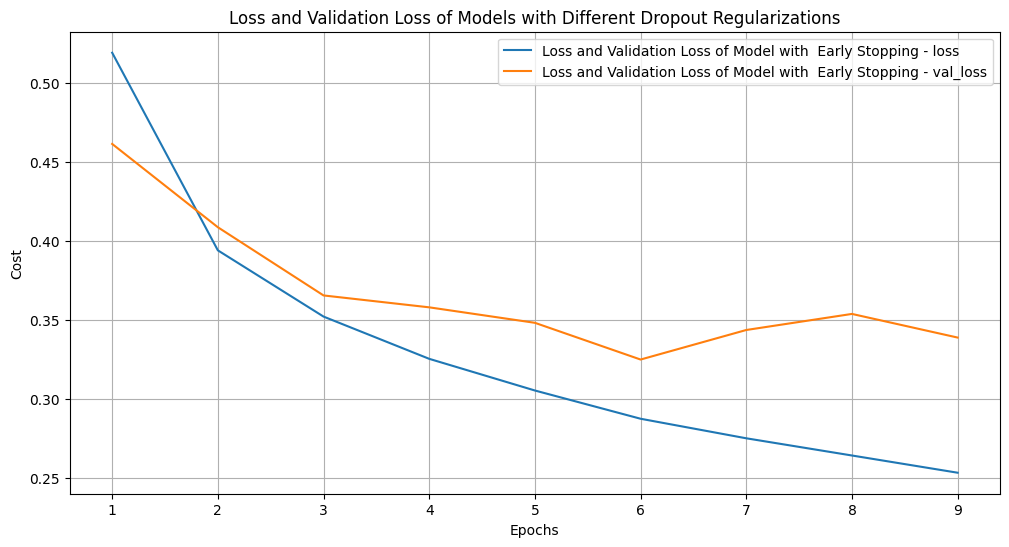

In [48]:
plot_loss(history_early_stopping, 'Loss and Validation Loss of Model with  Early Stopping')


Monte Carlo Dropout Regularization

In [49]:
from tensorflow.keras.layers import Layer

In [50]:

class MCDropout(Layer):
    def __init__(self, rate, **kwargs):
        super(MCDropout, self).__init__(**kwargs)
        self.rate = rate

    def call(self, inputs):
        return layers.Dropout(self.rate)(inputs, training=True)

def create_model_mc_dropout(dropout_position=None, dropout_rate=0.5):
    model = models.Sequential()
    
    if dropout_position == 'input':
        model.add(MCDropout(dropout_rate, input_shape=(28, 28)))
        model.add(layers.Flatten())
    else:
        model.add(layers.Flatten(input_shape=(28, 28)))
    
    model.add(layers.Dense(128, activation='relu'))
    
    if dropout_position == 'hidden' or dropout_position == 'both':
        model.add(MCDropout(dropout_rate))
    
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [51]:
num_epochs = 10

model_mc_dropout_input = create_model_mc_dropout(dropout_position='input', dropout_rate=0.5)
model_mc_dropout_input.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)

model_mc_dropout_hidden = create_model_mc_dropout(dropout_position='hidden', dropout_rate=0.5)
model_mc_dropout_hidden.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)

model_mc_dropout_both = create_model_mc_dropout(dropout_position='both', dropout_rate=0.5)
model_mc_dropout_both.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.6428 - accuracy: 0.7698 - val_loss: 0.5335 - val_accuracy: 0.8031
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5048 - accuracy: 0.8171 - val_loss: 0.4749 - val_accuracy: 0.8267
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4637 - accuracy: 0.8298 - val_loss: 0.4716 - val_accuracy: 0.8267
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4369 - accuracy: 0.8382 - val_loss: 0.4555 - val_accuracy: 0.8343
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4246 - accuracy: 0.8425 - val_loss: 0.4448 - val_accuracy: 0.8320
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4141 - accuracy: 0.8450 - val_loss: 0.4199 - val_accuracy: 0.8418
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4012 - accuracy: 0.8514 - val_loss: 0.4208 - val_accuracy:

In [52]:
def monte_carlo_predictions(model, x, num_forward_passes=50):
    predictions = np.zeros((num_forward_passes, x.shape[0], 10))

    for i in range(num_forward_passes):
        predictions[i] = model.predict(x)

    return np.mean(predictions, axis=0)


In [53]:
mc_preds_input = monte_carlo_predictions(model_mc_dropout_input, x_test)
mc_preds_hidden = monte_carlo_predictions(model_mc_dropout_hidden, x_test)
mc_preds_both = monte_carlo_predictions(model_mc_dropout_both, x_test)


313/313 [==============================] - 0s 2ms/step


In [54]:
test_acc_mc_input = np.mean(np.argmax(mc_preds_input, axis=1) == y_test)
test_acc_mc_hidden = np.mean(np.argmax(mc_preds_hidden, axis=1) == y_test)
test_acc_mc_both = np.mean(np.argmax(mc_preds_both, axis=1) == y_test)


various initializations 



In [55]:
def create_model(initializer):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    model.add(layers.Dense(128, activation='relu', kernel_initializer=initializer))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [56]:
num_epochs = 10

# Random Uniform Initialization
initializer = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05)
model_random_uniform = create_model(initializer)
history_random_uniform = model_random_uniform.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5179 - accuracy: 0.8191 - val_loss: 0.4374 - val_accuracy: 0.8407
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3904 - accuracy: 0.8597 - val_loss: 0.4355 - val_accuracy: 0.8461
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3503 - accuracy: 0.8721 - val_loss: 0.3556 - val_accuracy: 0.8702
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3225 - accuracy: 0.8826 - val_loss: 0.3459 - val_accuracy: 0.8756
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3039 - accuracy: 0.8878 - val_loss: 0.3514 - val_accuracy: 0.8735
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2906 - accuracy: 0.8927 - val_loss: 0.3452 - val_accuracy: 0.8773
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2775 - accuracy: 0.8969 - val_loss: 0.3260 - val_accuracy:

In [57]:
# Random Normal Initialization
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05)
model_random_normal = create_model(initializer)
history_random_normal = model_random_normal.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5261 - accuracy: 0.8146 - val_loss: 0.4730 - val_accuracy: 0.8374
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3893 - accuracy: 0.8605 - val_loss: 0.3821 - val_accuracy: 0.8633
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3461 - accuracy: 0.8737 - val_loss: 0.3498 - val_accuracy: 0.8742
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3182 - accuracy: 0.8843 - val_loss: 0.3557 - val_accuracy: 0.8729
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3006 - accuracy: 0.8884 - val_loss: 0.3418 - val_accuracy: 0.8737
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2818 - accuracy: 0.8956 - val_loss: 0.3237 - val_accuracy: 0.8842
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2691 - accuracy: 0.9010 - val_loss: 0.3140 - val_accuracy:

In [58]:
# Glorot Uniform Initialization
initializer = tf.keras.initializers.GlorotUniform()
model_glorot_uniform = create_model(initializer)
history_glorot_uniform = model_glorot_uniform.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5189 - accuracy: 0.8198 - val_loss: 0.4253 - val_accuracy: 0.8494
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3892 - accuracy: 0.8596 - val_loss: 0.3922 - val_accuracy: 0.8597
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3463 - accuracy: 0.8726 - val_loss: 0.3502 - val_accuracy: 0.8737
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3211 - accuracy: 0.8827 - val_loss: 0.3485 - val_accuracy: 0.8732
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3013 - accuracy: 0.8889 - val_loss: 0.3387 - val_accuracy: 0.8765
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2876 - accuracy: 0.8938 - val_loss: 0.3341 - val_accuracy: 0.8787
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2732 - accuracy: 0.8985 - val_loss: 0.3257 - val_accuracy:

In [59]:
# Glorot Normal Initialization
initializer = tf.keras.initializers.GlorotNormal()
model_glorot_normal = create_model(initializer)
history_glorot_normal = model_glorot_normal.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5151 - accuracy: 0.8183 - val_loss: 0.4036 - val_accuracy: 0.8559
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3813 - accuracy: 0.8616 - val_loss: 0.3801 - val_accuracy: 0.8667
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3407 - accuracy: 0.8748 - val_loss: 0.3410 - val_accuracy: 0.8780
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3148 - accuracy: 0.8842 - val_loss: 0.3386 - val_accuracy: 0.8756
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2976 - accuracy: 0.8903 - val_loss: 0.3541 - val_accuracy: 0.8712
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2821 - accuracy: 0.8956 - val_loss: 0.3288 - val_accuracy: 0.8818
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2696 - accuracy: 0.8982 - val_loss: 0.3349 - val_accuracy:

In [60]:
# He Uniform Initialization
initializer = tf.keras.initializers.HeUniform()
model_he_uniform = create_model(initializer)
history_he_uniform = model_he_uniform.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5217 - accuracy: 0.8192 - val_loss: 0.4141 - val_accuracy: 0.8537
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3842 - accuracy: 0.8632 - val_loss: 0.3978 - val_accuracy: 0.8546
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3467 - accuracy: 0.8736 - val_loss: 0.3709 - val_accuracy: 0.8658
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3207 - accuracy: 0.8827 - val_loss: 0.3502 - val_accuracy: 0.8723
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3006 - accuracy: 0.8888 - val_loss: 0.3429 - val_accuracy: 0.8768
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2863 - accuracy: 0.8945 - val_loss: 0.3468 - val_accuracy: 0.8745
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2730 - accuracy: 0.8971 - val_loss: 0.3293 - val_accuracy:

In [61]:
# He Normal Initialization
initializer = tf.keras.initializers.HeNormal()
model_he_normal = create_model(initializer)
history_he_normal = model_he_normal.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5208 - accuracy: 0.8170 - val_loss: 0.4130 - val_accuracy: 0.8574
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3896 - accuracy: 0.8603 - val_loss: 0.3794 - val_accuracy: 0.8663
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3467 - accuracy: 0.8753 - val_loss: 0.3692 - val_accuracy: 0.8667
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3235 - accuracy: 0.8814 - val_loss: 0.3622 - val_accuracy: 0.8689
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3032 - accuracy: 0.8896 - val_loss: 0.3573 - val_accuracy: 0.8730
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2877 - accuracy: 0.8932 - val_loss: 0.3287 - val_accuracy: 0.8827
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2761 - accuracy: 0.8976 - val_loss: 0.3379 - val_accuracy:

Batch Normalization

In [62]:
def create_model(initializer, use_batch_norm=False):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    
    model.add(layers.Dense(128, kernel_initializer=initializer))
    if use_batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [63]:
initializer = tf.keras.initializers.HeNormal()
model_he_normal_bn = create_model(initializer, use_batch_norm=True)
history_he_normal_bn = model_he_normal_bn.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4824 - accuracy: 0.8295 - val_loss: 0.3862 - val_accuracy: 0.8603
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3695 - accuracy: 0.8675 - val_loss: 0.3635 - val_accuracy: 0.8677
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3312 - accuracy: 0.8801 - val_loss: 0.3494 - val_accuracy: 0.8730
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3055 - accuracy: 0.8880 - val_loss: 0.3507 - val_accuracy: 0.8739
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2878 - accuracy: 0.8941 - val_loss: 0.3532 - val_accuracy: 0.8738
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2737 - accuracy: 0.8991 - val_loss: 0.3484 - val_accuracy: 0.8750
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2576 - accuracy: 0.9047 - val_loss: 0.3392 - val_accuracy:

Custom Dropout and Custom Regularization

In [64]:
from tensorflow.keras.layers import Layer

class CustomDropout(Layer):
    def __init__(self, rate, **kwargs):
        super(CustomDropout, self).__init__(**kwargs)
        self.rate = rate

    def call(self, inputs):
        return layers.Dropout(self.rate)(inputs, training=True)


In [65]:
from tensorflow.keras import backend as K

def custom_l1_reg(weight_matrix):
    return 0.01 * K.sum(K.abs(weight_matrix))


In [66]:
#model
def create_model(use_custom_dropout=False, custom_dropout_rate=0.5, use_custom_l1_reg=False):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    
    if use_custom_l1_reg:
        kernel_regularizer = custom_l1_reg
    else:
        kernel_regularizer = None
        
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=kernel_regularizer))
    
    if use_custom_dropout:
        model.add(CustomDropout(custom_dropout_rate))
    
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [33]:
#creating and training models
num_epochs = 10

model_custom_dropout = create_model(use_custom_dropout=True, custom_dropout_rate=0.5)
history_custom_dropout = model_custom_dropout.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)

model_custom_l1_reg = create_model(use_custom_l1_reg=True)
history_custom_l1_reg = model_custom_l1_reg.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.6428 - accuracy: 0.7743 - val_loss: 0.5225 - val_accuracy: 0.8145
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4812 - accuracy: 0.8253 - val_loss: 0.4863 - val_accuracy: 0.8255
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4493 - accuracy: 0.8384 - val_loss: 0.4525 - val_accuracy: 0.8409
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4258 - accuracy: 0.8445 - val_loss: 0.4388 - val_accuracy: 0.8441
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4090 - accuracy: 0.8500 - val_loss: 0.4410 - val_accuracy: 0.8385
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3994 - accuracy: 0.8539 - val_loss: 0.4166 - val_accuracy: 0.8530
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3890 - accuracy: 0.8577 - val_loss: 0.4274 - val_accuracy:

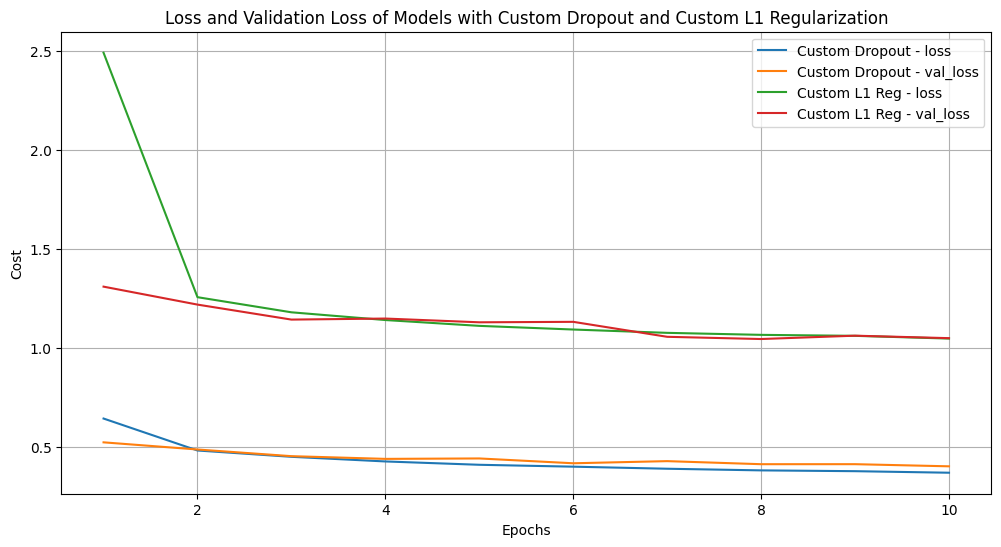

In [34]:
def plot_custom_loss(histories, labels):
    fig, ax = plt.subplots(figsize=(12, 6))
    
    for history, label in zip(histories, labels):
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs = np.arange(1, len(loss) + 1)
        
        plt.plot(epochs, loss, label=f"{label} - loss")
        plt.plot(epochs, val_loss, label=f"{label} - val_loss")
    
    plt.title('Loss and Validation Loss of Models with Custom Dropout and Custom L1 Regularization')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid(True)
    plt.show()

histories = [history_custom_dropout, history_custom_l1_reg]
labels = ["Custom Dropout", "Custom L1 Reg"]

plot_custom_loss(histories, labels)
